In [49]:
#Importing the necessary Libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential           #For creating Sequential model
from tensorflow.keras.layers import Dense, Flatten       #For creating neural networks
from tensorflow.keras.utils import to_categorical        #For converting labels to one-hot encoding
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Loads the Fashion MNIST dataset, splitting it into training and testing sets

In [50]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [51]:
# Display the shape of the x_train array
# x_train is the array containing the training data (fashion images)
# The shape attribute returns a tuple representing the dimensions of the array
# This helps to understand the number of training samples and their dimensions
print(x_train.shape)

(60000, 28, 28)


In [52]:
# Display the shape of the y_test array
# y_test is the array containing the labels for the test dataset
# The shape attribute returns a tuple representing the dimensions of the array
# This is useful for understanding the structure and size of the test labels
print(y_test.shape)

(10000,)


#### Scales pixel values to the range [0,1]

In [53]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### Convert the labels to one-hot encoded format for multi-class classification

In [54]:
# Let's convert the labels to categorical format
# This code converts the labels into a one-hot encoded format with 10 dimensions
# Each label will be represented as a binary vector of length 10
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
# Let's check how the labels look after converting to categorical format
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [56]:
# 4. Display the 10 classes of images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Visualizes the first 10 images of the training set with their class names.

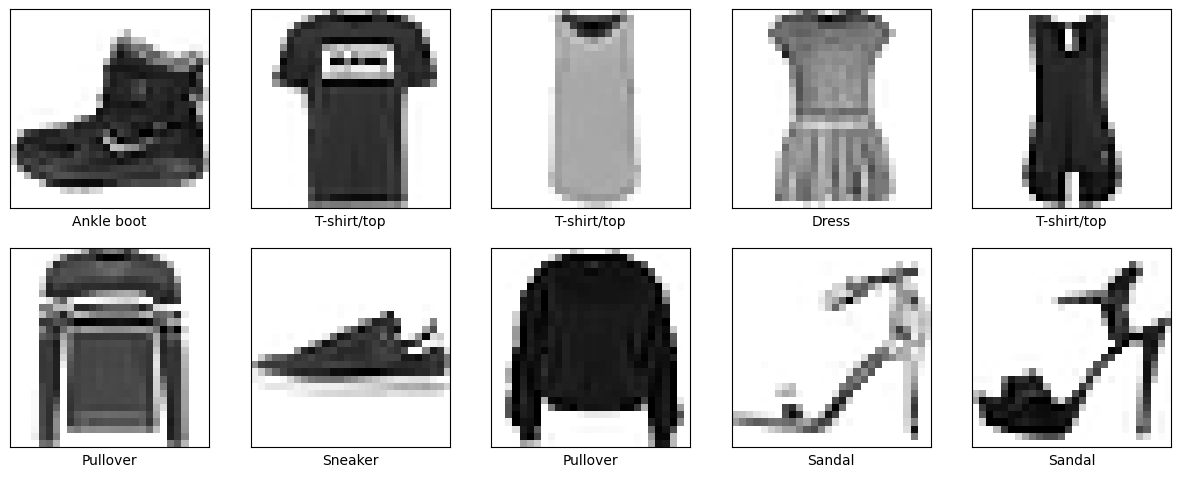

In [9]:
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

#### Defines a sequential model with a flattening layer and dense layers using ReLU and softmax activations.

In [57]:
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
# Input shape is set to (28, 28) representing the dimensions of the input images
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))   # First hidden layer with 128 neurons and ReLU as activation function
model.add(Dense(64, activation='relu'))    # Second Hidden layer with 64 neurons and ReLU as activation function

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
model.add(Dense(10, activation='softmax'))

#### Display a summary of the model architecture, including the number of parameters in each layer

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


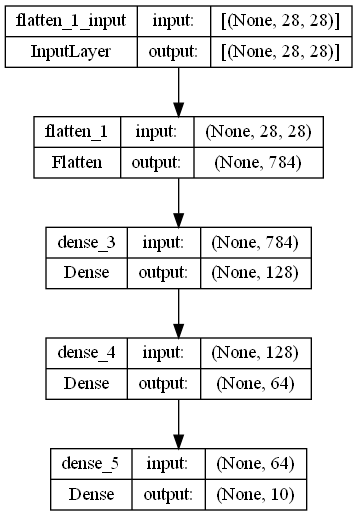

In [59]:
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

#### Compiles the model using the Adam optimizer, categorical cross-entropy loss, and accuracy metric.

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# Train the model for one epoch on the training data and validate on the test data, storing the training history
history = model.fit(x_train,y_train, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4971 - accuracy: 0.8244 - val_loss: 0.4237 - val_accuracy: 0.8496
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3648 - accuracy: 0.8669 - val_loss: 0.4108 - val_accuracy: 0.8511
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3315 - accuracy: 0.8776 - val_loss: 0.3869 - val_accuracy: 0.8576
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3092 - accuracy: 0.8858 - val_loss: 0.3479 - val_accuracy: 0.8752
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2916 - accuracy: 0.8909 - val_loss: 0.3428 - val_accuracy: 0.8758
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2784 - accuracy: 0.8968 - val_loss: 0.3479 - val_accuracy: 0.8757
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2656 - accuracy: 0.8997 - val_loss: 0.3352 - val_accuracy:

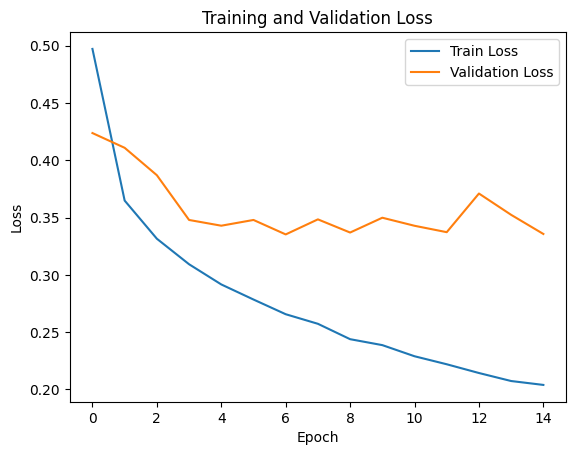

In [62]:
# Plotting the training loss curve
plt.plot(history.history['loss'], label='Train Loss')

# Plotting the validation loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding legend to the plot
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

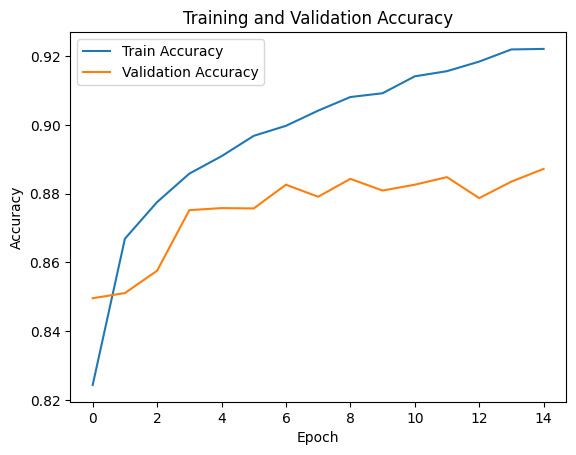

In [63]:
# Plotting the training accuracy curve
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Plotting the validation accuracy curve
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Adding legend to the plot
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [64]:
#Saving the trained model to a file
model.save('Fashion_mnist_model.h5')

In [65]:
#Loading the trained model
model = tf.keras.models.load_model('Fashion_mnist_model.h5')

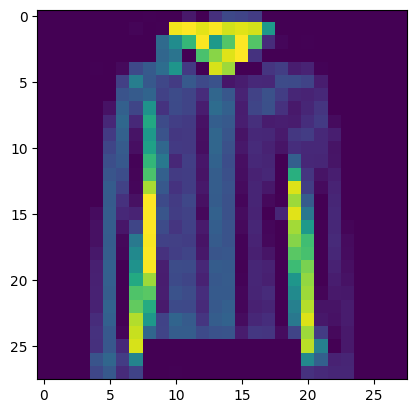

In [73]:
plt.imshow(x_test[6])

#### Predicts the classes for the test images and visualizes the first test image along with its predicted and true labels.

1/1 [==============================] - 0s 19ms/step


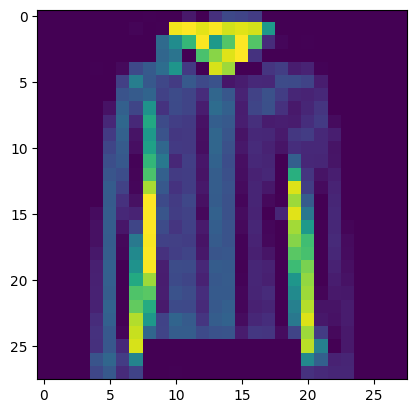

Predicted label: Coat
True label: Coat


In [78]:
prediction = model.predict(x_test[6].reshape(1, 28, 28))
predicted_label = class_names[prediction.argmax()]
true_label = class_names[y_test[6].argmax()]

plt.figure()
plt.imshow(x_test[6])
plt.grid(False)
plt.show()

print(f'Predicted label: {predicted_label}')
print(f'True label: {true_label}')

1/1 [==============================] - 0s 20ms/step


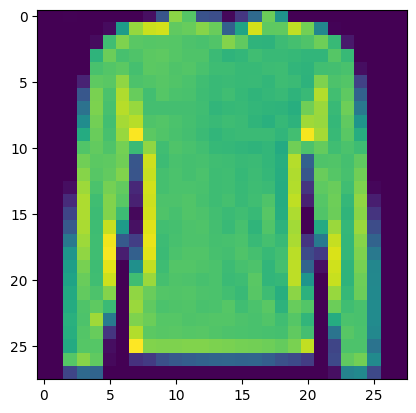

Predicted Label: Pullover
True Label: Pullover


In [82]:
prediction = model.predict(x_test[55].reshape(1,28,28))
predicted_label = class_names[prediction.argmax()]
true_label = class_names[y_test[55].argmax()]

plt.figure()
plt.imshow(x_test[55])
plt.show()

print(f'Predicted Label: {predicted_label}')
print(f'True Label: {true_label}')